<a href="https://colab.research.google.com/github/vitoriapmaattos/dataanalytics/blob/main/Fase2_Aula2_CaseSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#Import Pandas

import pandas as pd

In [86]:
#Importando os dados

df = pd.read_excel('dataset_rolling_stones.xlsx')
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [87]:
#Pegando as colunas e os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [88]:
#Visualizando o tamanho do dataframe - linhasXcolunas
df.shape

(1610, 15)

In [89]:
#Existe dados nulos na minha base?

df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [90]:
#Conferindo se tem dados duplicados

df.duplicated().sum()

6

In [91]:
#Exibindo os dados duplicados

df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [92]:
#Quando foi o primeiro lançamento?

print("Data Inicial: ", df['release_date'].min())

#Quando foi o último lançamento
print("Data Final: ", df['release_date'].max())

Data Inicial:  1964-04-16 00:00:00
Data Final:  2022-06-10 00:00:00


In [93]:
#Criando uma nova coluna para transformar a coluna de milissegundos para minutos

df["duracao_em_minutos"] = df["duration_ms"]/60000

df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [94]:
#Estatistica básica da base de dados

df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [95]:
#Duração média das músicas por album
df.groupby("album")["duracao_em_minutos"].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_minutos, Length: 90, dtype: float64

In [96]:
#Importando o MatplotLib

import matplotlib.pyplot as plt

In [97]:
#Criando uma variável agrupada por album, com a média de duração média das músicas ordenadas do maior por menor

df_maior_duracao_musica =  df.groupby("album")["duracao_em_minutos"].mean().sort_values(ascending=False)
df_maior_duracao_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_em_minutos, Length: 90, dtype: float64

Text(0, 0.5, 'Duração média em minutos')

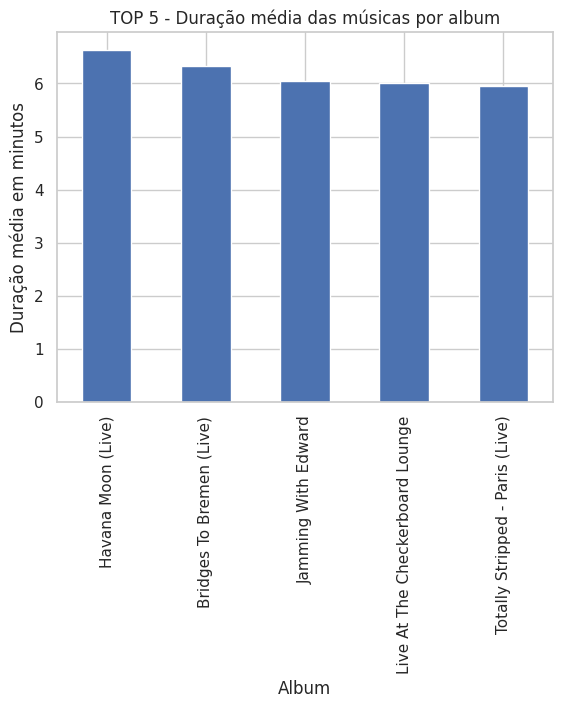

In [98]:
df_maior_duracao_musica.head(5).plot(kind='bar')
plt.title("TOP 5 - Duração média das músicas por album")
plt.xlabel("Album")
plt.ylabel("Duração média em minutos")

Text(0, 0.5, 'Album')

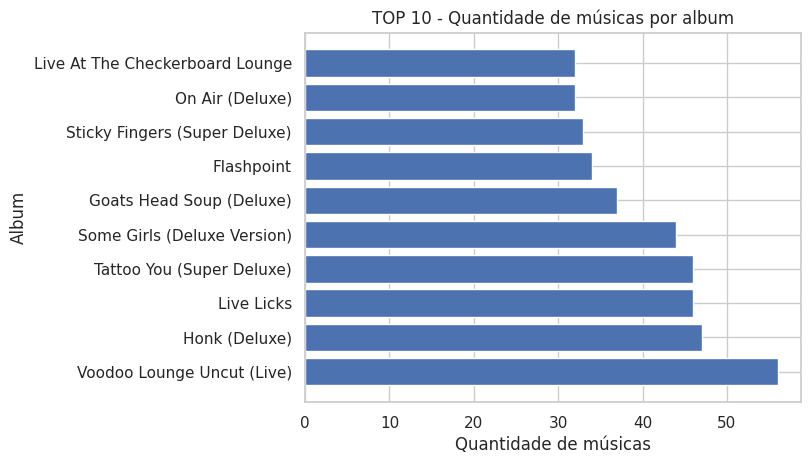

In [99]:
#Analisando os top 10 albums com mais músicas em um gráfico de barra horizontal
top_albuns = df['album'].value_counts().head(10)

#Separando os nossos valores no eixo X e Y
plt.barh(top_albuns.index, top_albuns.values)
plt.title("TOP 10 - Quantidade de músicas por album")
plt.xlabel("Quantidade de músicas")
plt.ylabel("Album")

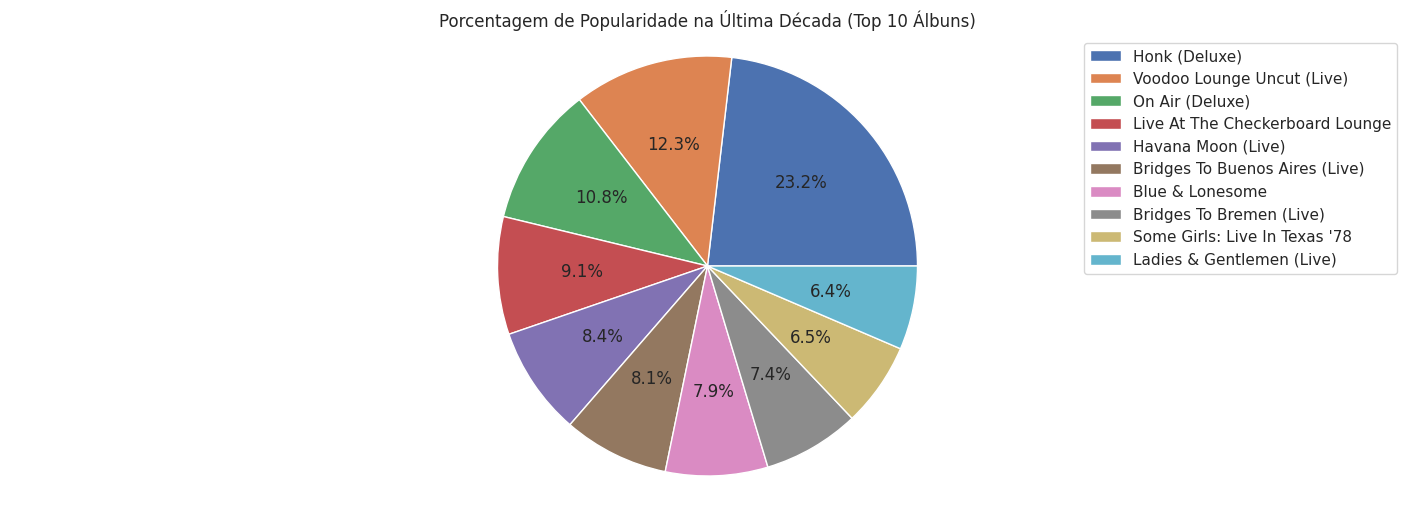

In [100]:
#Analisando a porcentagem de popularidade dos top 10 Álbum na última decada
#Filtrar o DataFrame para manter apenas os registros da última década
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

#Agrupar os dados por álbum e somar a coluna "popularity"
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

#Calcular a porcentagem de popularidade para cada álbum
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

#Vamos separar nossos valores e nomes em uma lista, para deixar o gráfico mais apresentável
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

#Aqui estamos configurando o nosso gráfico, vamos criar um de pizza agora.
#Com a configuração subplots podemos gerar vários gráficos dentro de um só ou tambem organizar o tamanho dele, nesse caso queremos somente organizar o tamanho
figura, grafico = plt.subplots(figsize=(18, 6))
#Criando o gráfico, detalhe que dessa vez estamos passando um parâmetro novo, o autopct, isso faz com que configure e formate nossos valores em porcentagem para duas casas decimais.
grafico.pie(sizes, autopct='%1.1f%%')
#Essa configuração nos ajuda a que os tamanhos sejam proporcionais, assim fazendo que o gráfico tenha de fato uma forma circular.
grafico.axis('equal')
plt.title('Porcentagem de Popularidade na Última Década (Top 10 Álbuns)')
#Criando uma legenda separada, para melhor visualização e entendimento
plt.legend(labels, loc='best')
#Mostrando o gráfico
plt.show()


**Outliers**

In [101]:
#Importando outra biblioteca para visualizar os Outliers
import seaborn as sns

Text(0.5, 1.0, 'Boxplot da Duração das Músicas')

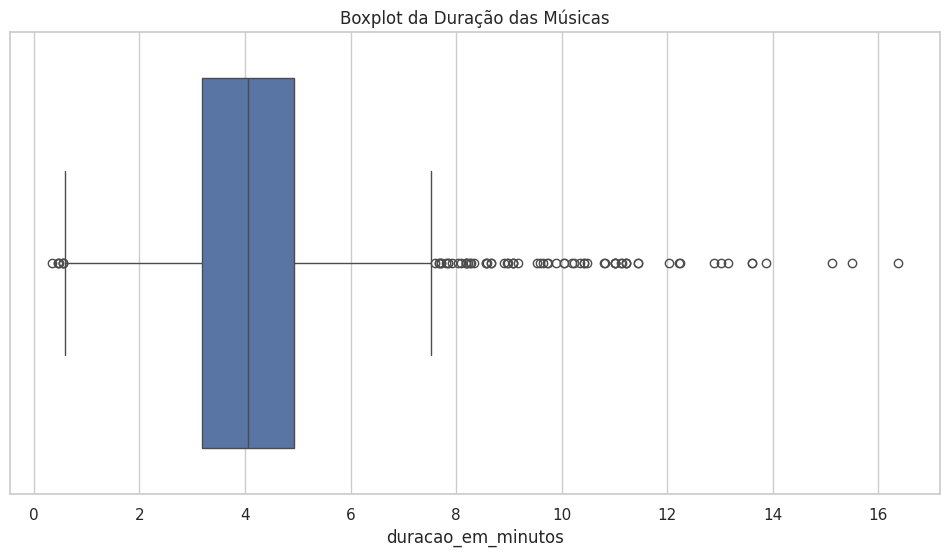

In [102]:
#Criando um gráfico de caixas - boxplot

sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['duracao_em_minutos'], data=df)
axes.set_title('Boxplot da Duração das Músicas')

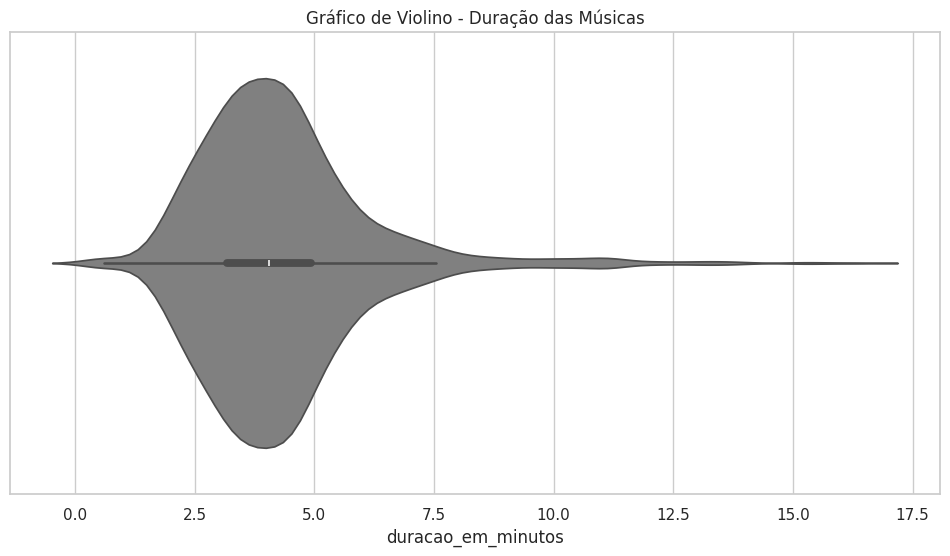

In [103]:
#Criando um gáfico do tipo violino

fig, axes = plt.subplots(figsize=(12, 6))
sns.violinplot(x=df['duracao_em_minutos'], data=df, color="gray")
axes.set_title('Gráfico de Violino - Duração das Músicas')
plt.show()

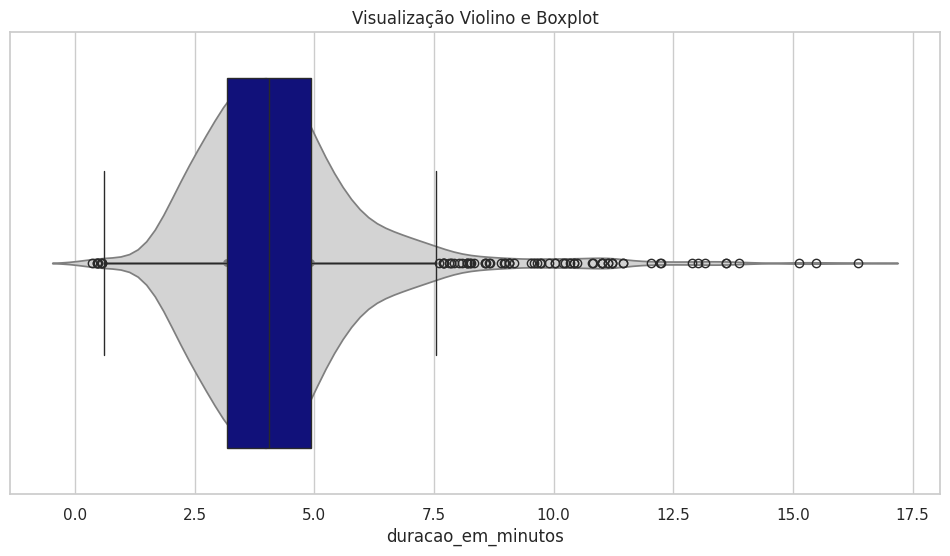

In [104]:
#Criando uma visualização de um gráfico misto, com o violino e o boxplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='duracao_em_minutos', data=df, ax=ax, color="lightgray")
sns.boxplot(x='duracao_em_minutos', data=df, ax=ax, whis=1.5, color="darkblue")
ax.set_title('Visualização Violino e Boxplot')
plt.show()

Como temos algumas músicas maiores que 7 minutos, podemos supor que estas músicas são músicas ao vivo.

Para confirmar isso, iremos analisar essas músicas, com atenção.

Podemos começar analisando a coluna LIVENESS.


In [105]:
#Vamos criar uma função para dividir esses dados

def classifica_musica_ao_vivo(df):

    if df['liveness'] >= 0.8:
        return True
    else:
        return False


   Essa é uma função que serve para verificar se a música possui um alto valor
    de chiado da audiência, consideramos que tudo acima de 0.8 de ruído pode ser
    uma música ao vivo.

    Parâmetros
    ----------
    df : pandas.DataFrame
      Nosso dataset que vai usado como input

    Retorna
    ----------
    True : Booleano
      Verdadeiro para os casos que a música seja ao vivo.
    False: Booleano
      Falso para os casos que a música não seja ao vivo.

In [115]:
# Aplica a função a cada linha do DataFrame e cria uma nova coluna com a classificação
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis=1)

In [116]:
#Vamos verificar como ficou nosso dataset
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False


In [117]:
#Agora vamos agrupar esses dados para analisar

df.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [122]:
 #Separando os data frames
 df_gravado_em_studio = df[df['ao_vivo'] == False]
 df_show_ao_vivo = df[df['ao_vivo'] == True]

In [125]:
#Analisando a média da duração das músicas dos dois data frames

print("Média de duração das músicas ao vivo: ", df_show_ao_vivo['duracao_em_minutos'].mean())
print("Média de duração das músicas gravadas em studio: ", df_gravado_em_studio['duracao_em_minutos'].mean())

Média de duração das músicas ao vivo:  5.088648962516734
Média de duração das músicas gravadas em studio:  3.940451363908873


Gráficos de Histogramas - Loudness (Barulho das músicas)

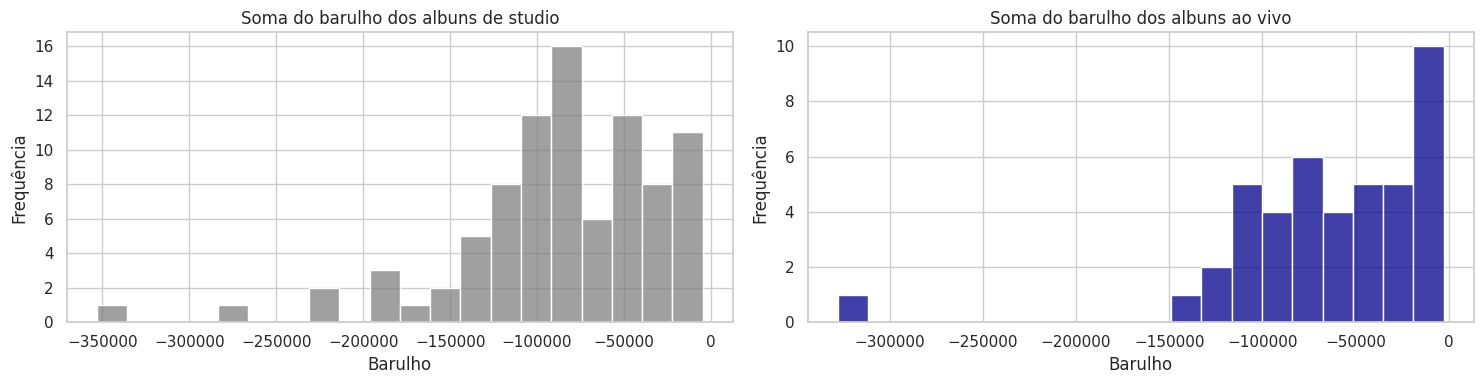

In [126]:
#Vamos gerar uma distribuição sobre o Barulho das músicas em nossos albuns ao vivo VS os gravados em studio.
df_studio = df_gravado_em_studio.groupby('album')['loudness'].sum()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()


#Configuração para criar dois gráficos lado a lado

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#Criando o gráfico de histograma com o seaborn
#Gráfico Studio
sns.histplot(data=df_studio, bins=20, ax=axes[0], color="gray")
axes[0].set_title("Soma do barulho dos albuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

#Gráfico ao vivo
sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1], color="darkblue")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")
axes[1].set_title("Soma do barulho dos albuns ao vivo")

#Ajustando o espaçamento entre os gráficos e mostrando em nossa tela
fig.tight_layout()
plt.show()

Conseguimos interpretar que cada barra representa um intervalo de frequência da soma do barulho, vamos exemplificar para ficar mais fácil o entendimento.

Analisando as barras com maiores picos de valores no histograma de albuns gravados em studio, podemos dizer que existem vários albuns da banda com um pico de frequência alto.

<ipython-input-128-d30adc80817e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_studio, label="Albus de Studio", shade=True, fill=True)
<ipython-input-128-d30adc80817e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_ao_vivo, label="Albus ao Vivo", shade=True, fill=True)


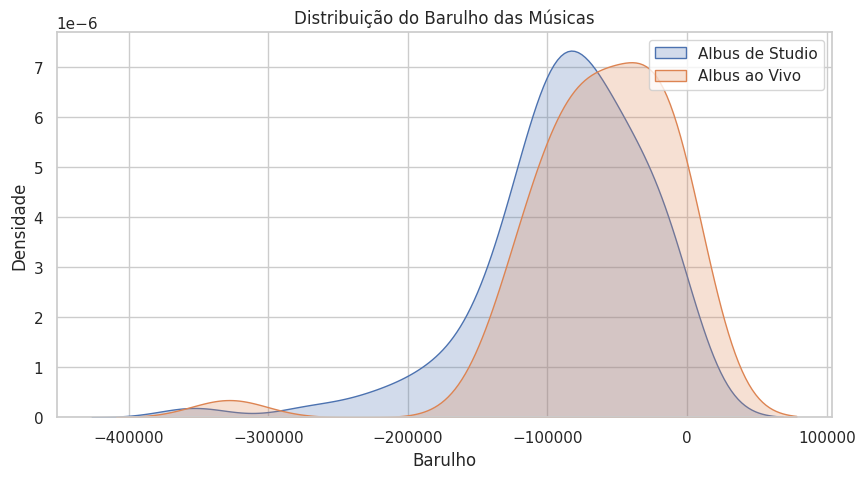

In [128]:
#Uma outra forma de visualizarmos a distruibuição da frequência dos valores é criando um gráfico de densidade.

plt.figure(figsize=(10, 5))

#Estrutura do gráfico de densidade para colocar um sobre o outro
sns.kdeplot(data=df_studio, label="Albus de Studio", shade=True, fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albus ao Vivo", shade=True, fill=True)


plt.title("Distribuição do Barulho das Músicas")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()
plt.show()

Como comprovar se essa distribuição é normal:

In [129]:
#Importando uma biblioteca de estatística no python Scipy, onde vamos trazer a função do teste shapiro
from scipy.stats import shapiro

#Vamos criar duas variáveis onde vamos armazenar os valores de significância/valor de probabilidade de nossos dados
stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de studio: ")
print('Estatística de teste: {:.4f}, Valor de probabilidade: {}'.format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipotese de normalidade é rejeitada.")


Soma do barulho dos albuns de studio: 
Estatística de teste: 0.8958, Valor de probabilidade: 3.2961095257633133e-06
A hipotese de normalidade é rejeitada.


In [130]:
#Vamos criar duas variáveis onde vamos armazenar os valores de significância/valor de probabilidade de nossos dados
stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albuns ao vivo: ")
print('Estatística de teste: {:.4f}, Valor de probabilidade: {}'.format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipotese de normalidade é rejeitada.")

Soma do barulho dos albuns ao vivo: 
Estatística de teste: 0.7913, Valor de probabilidade: 2.35057973441144e-06
A hipotese de normalidade é rejeitada.


In [131]:
#Vamos importar essa função da mesma biblioteca de estatística
from scipy.stats import mannwhitneyu

#Realizando teste de mann withney U
#Aqui precisamos trazer os nossos dois dataframes na seguinte ordem H0 e depois  O H1
#Ou seja estamos dizendo que o df_studio é diferente do df_ao_vivo
#Não se esqueça de trazer amostras aleatórias usando o método sample do pandas.
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)),  alternative='less')

print("Estatistica de teste U: ", stat)
print("Valor de probabilidade: ", p)
alpha = 0.05
if p > alpha:
    print('Diferença estatisticamente significante')
else:
    print('Não há diferença estatisticamente significante.')


Estatistica de teste U:  1367.0
Valor de probabilidade:  0.0050727361177996585
Não há diferença estatisticamente significante.


In [132]:
#Vamos analisar a valência das músicas, se são músicas mais alegre ou tristes

#Criando um novo data set
media_por_album = df.groupby('album')['valence'].mean().reset_index()

#Renomeando a coluna de média
media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})

#Criando uma nova coluna com o if para segmentar
media_por_album['Sentimento'] =['Alegres' if v >0.6 else 'Tristes' for v in media_por_album['media_valence']]

media_por_album.groupby('Sentimento')['Sentimento'].count()


Sentimento
Alegres    52
Tristes    38
Name: Sentimento, dtype: int64

In [133]:
#Para isso precisamos trazer a nossa coluna de sentimento para nosso dataframe inteiro, pois lá temos todas as outras variáveis.
#Vamos realizar uma função no python chamada de merge, para isso precisamos passar nossa chave de relação
#Ou seja qual coluna é nosso identificador único, que possuimos em ambos dataframe, nesse caso só vamos possuir o album
df_resultado_final = pd.merge(df, media_por_album, on='album')
#Vamos verificar nosso novo dataframe criado
df_resultado_final.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_minutos,ao_vivo,media_valence,Sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,Tristes
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,Tristes


In [140]:
#Mudar o data type da coluna ao vivo para int64

df_resultado_final['ao_vivo'] = df_resultado_final['ao_vivo'].astype('int64')


In [138]:
#Cria a matriz de correlação
matriz_correlacao = df_resultado_final.select_dtypes(include=['number']).corr()

#Seleciona apenas a linha e a coluna correspondentes à coluna "media_valence"
correlacao_sentimento = matriz_correlacao['media_valence']

#Vamos verificar a relação entre as outras colunas a média valence dos albuns, onde classificamos se ela é positivo ou negativo
display(correlacao_sentimento)

track_number         -0.115007
acousticness          0.015491
danceability          0.492945
energy               -0.347447
instrumentalness      0.133741
liveness             -0.571749
loudness             -0.229543
speechiness          -0.416005
tempo                -0.028887
valence               0.603258
popularity            0.100509
duration_ms          -0.309499
duracao_em_minutos   -0.309499
ao_vivo              -0.549736
media_valence         1.000000
Name: media_valence, dtype: float64

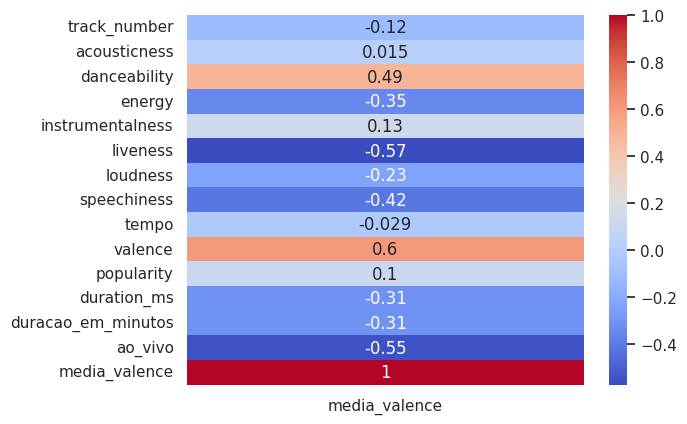

In [143]:
#Criação do heatmap = mapa de calor

sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')
plt.show()

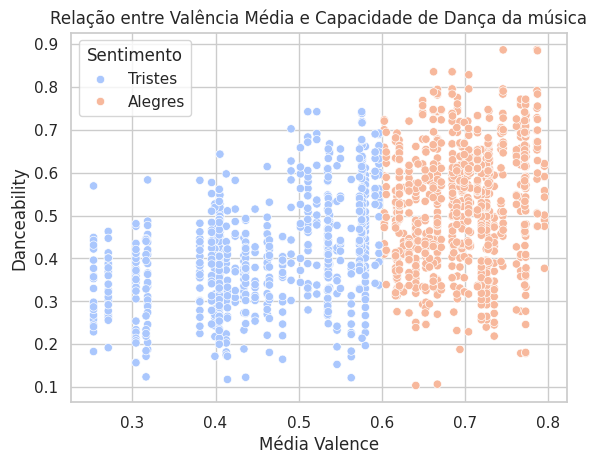

In [147]:
#Podemos considerar que a Correlação entre a media_valence e a danceability é uma CORRELAÇÃO MÉDIA
#Criando um gráfico de dispersão entre a media_valence e danceability


sns.scatterplot(x='media_valence', y='danceability', hue='Sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel('Média Valence')
plt.ylabel('Danceability')
plt.title('Relação entre Valência Média e Capacidade de Dança da música')
plt.show()

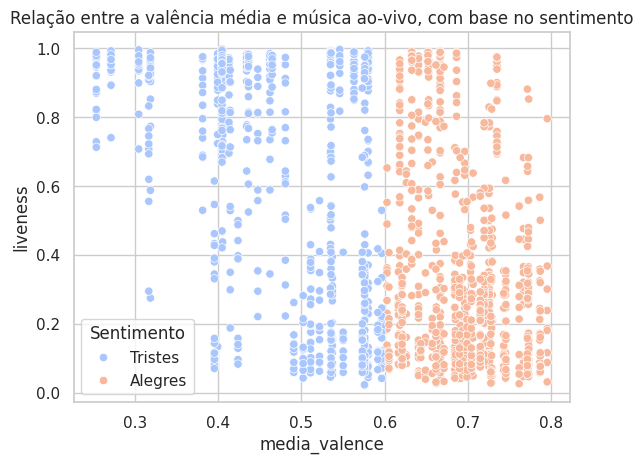

In [149]:
#CORRELAÇÃO NEGATIVA
#Vamos agora verificar uma coluna que não está fortemente correlacionada
sns.scatterplot(x='media_valence', y='liveness', hue='Sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel('media_valence')
plt.ylabel('liveness')
plt.title('Relação entre a valência média e música ao-vivo, com base no sentimento')
plt.show()